In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler 

In [4]:
cleaned_df = pd.read_csv(r"C:\Users\abhay\OneDrive\Desktop\data_science_project\cleaned_df.csv")

In [5]:
cleaned_df.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
# how many days since last purchase
# how many times the monetory purchase is done
# how much is the monetory value or sum total monetory amount 
# that a particular customer has spent

In [7]:
cleaned_df["salesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

# here we are finding the total monetory vlaue spent by each customer

In [8]:
cleaned_df

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,salesLineTotal
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...,...
406304,525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
406305,525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
406306,525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
406307,525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [9]:
# now let us aggregate our data and aggregate by grouping by 
# customer ID, then computing the aggrigate for the recency value
# and monetory value

In [10]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("salesLineTotal","sum"),
        Frequency=("Invoice","nunique"),
        LastInvoiceDate=("InvoiceDate","max")
    )

In [11]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [12]:
# aggregation syntax is what we have seen earlier
#    .agg( 
#            new_coloumn_name=("colounm_from_table", "ooperation")      
#    ) 

# by the table we can understand that, which customer, has spent how much
# monetary value, and fq is how many products bought or
# how many invoices are generated, and what was the last inovice date

# to get the recency feature

In [14]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["LastInvoiceDate"] = pd.to_datetime(aggregated_df["LastInvoiceDate"])
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [15]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


In [16]:
# the recency for how long it has been to the max date in the dataset

# now we will see if we outliers in our dataset, by looking at the 
# distribution of monetary value and recency

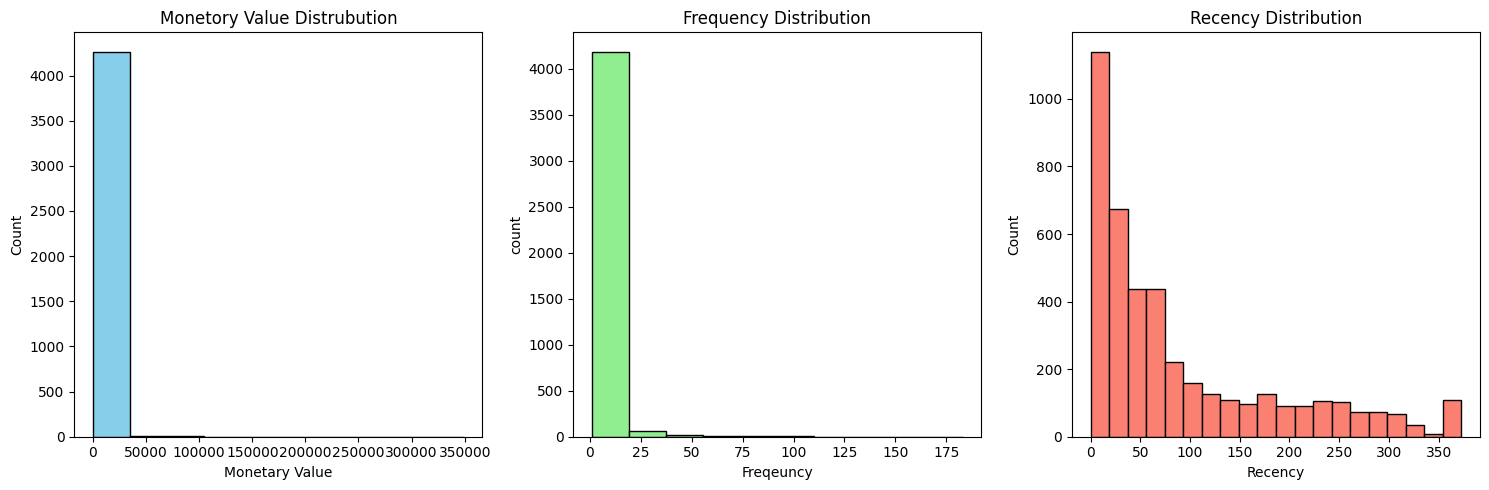

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetory Value Distrubution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='Lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Freqeuncy")
plt.ylabel("count")

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins=20, color="Salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [18]:
# from the above graph we can understand that, most of the monetary value falls under single bin
# but there are lot of outliers present, 
# from frequncy distribution we can understand that most of it also falls under single bin, but
# lot of outliers present given the other values in x label
# but the recency distribution is evenly present, so the possiblilty of outliers are very less, 
# with no real outliers

# we will make a box plot for more intricate understanding using a feature present in seaborn

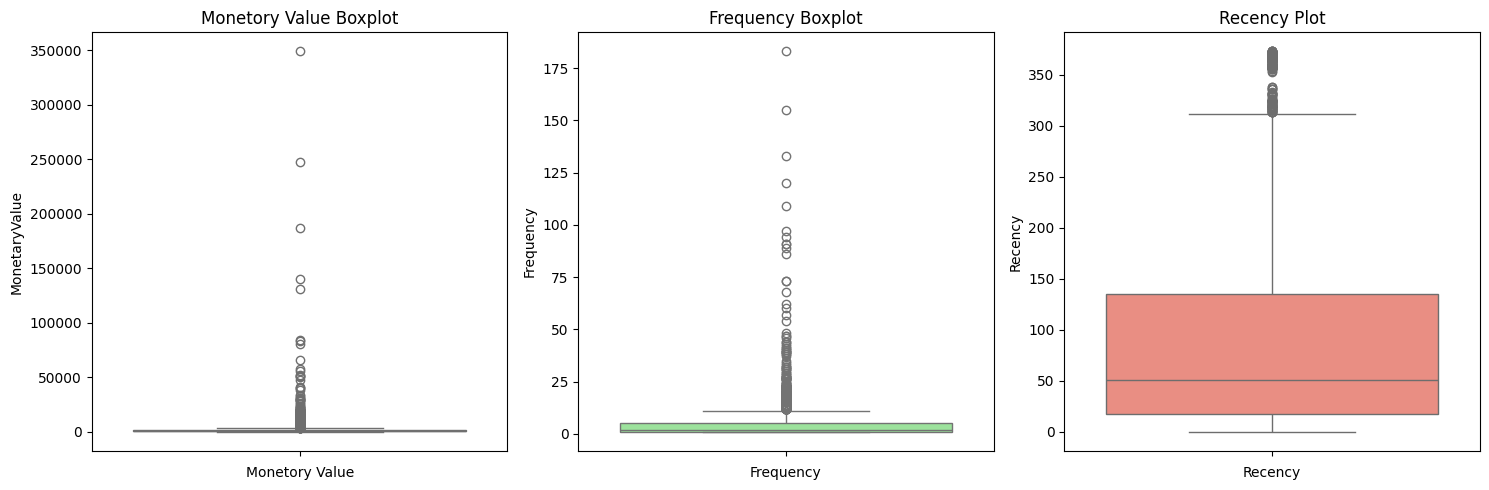

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetory Value Boxplot")
plt.xlabel("Monetory Value")

plt.subplot(1,3,2)
sns.boxplot(data=aggregated_df["Frequency"], color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df["Recency"], color='salmon')
plt.title("Recency Plot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

In [20]:
# in the box plot we can identify that, the little circles present above and below the plot, are
# outliers for "recency" it is somewhat nomal, but for the monetary anr frequncy, these are
# almost extreme, aas there are severe outliers present.

# so to deal with the outliers situation, we cannot simply reject all of them, cause this is a
# very valuable and important, form of data, so we will use inter quartile rate to get rid of 
# this ouliers situation

In [21]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outlers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

In [22]:
monetary_outlers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [23]:
# now let is get rid of outliers as well as frequency

In [24]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outlers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

In [25]:
frequency_outlers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [26]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outlers_df.index)) & (~aggregated_df.index.isin(frequency_outlers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


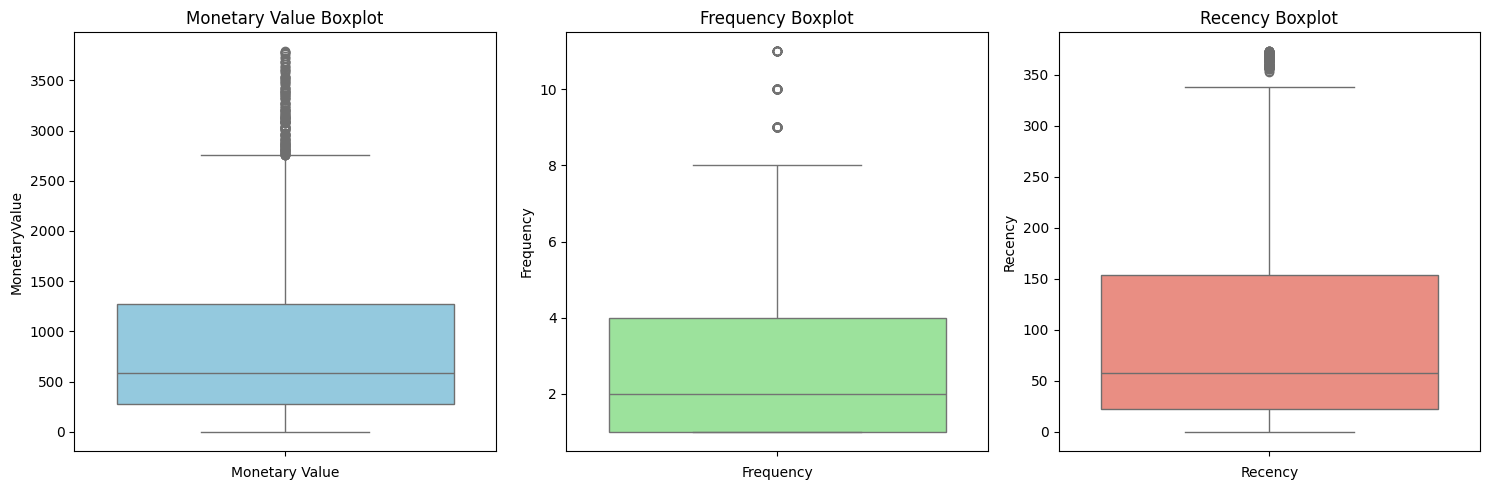

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [28]:
# using interquartile rate, we got rid of monetary as well as frequncy outliers that 
# present in the above dataset, after that we can still find some steady outliers 
# present but this type of data is lot more tolerable than the previous data.

In [29]:
# now let us create a plt of our data in 3 dimensions acorss recency | frequency | and
# monetary values.

<function matplotlib.pyplot.show(close=None, block=None)>

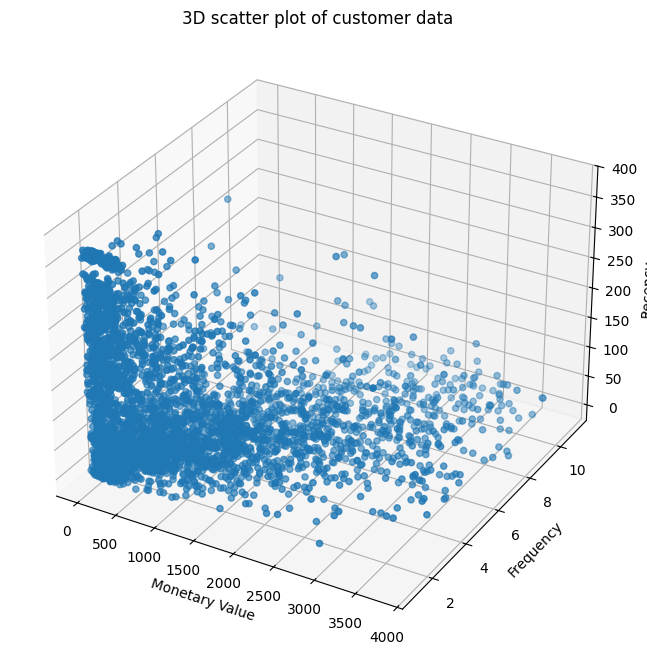

In [30]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter plot of customer data")

plt.show

In [31]:
# the problem is if we use 1000 for freqency, all the data would be present at a 
# particular spot over one cornor, and things would not be clear, and the kmeans 
# algorithm would be sensitive to this type of scaling, as the centroids would be
# present completly on one side of the graph.

In [32]:
# this is where we have to use a method called as standard scaling
#  z scale = (x - mean)/variance
# for this we will use sicit learn

In [33]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [34]:
# the scikit learn will take dataframe as an input but return the numpy array as 
# output, now we will convert this array back into dataframe

In [35]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

In [36]:
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


<function matplotlib.pyplot.show(close=None, block=None)>

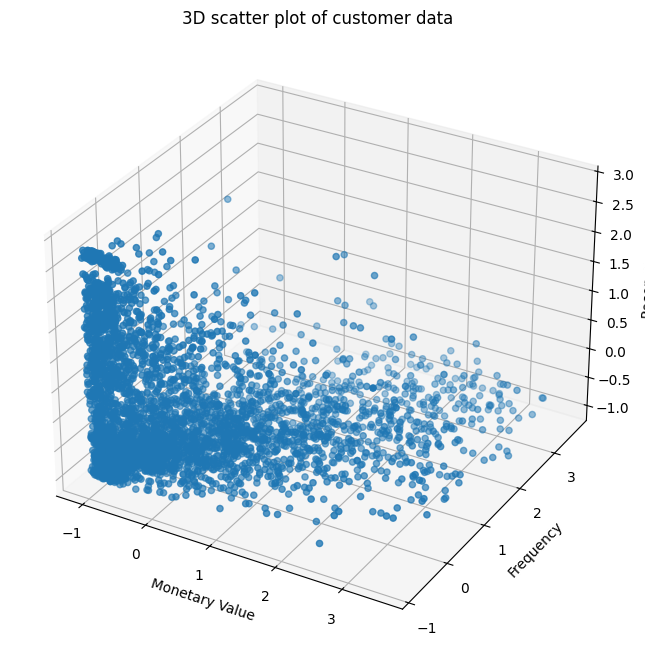

In [37]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter plot of customer data")

plt.show

# KMeans Clustering

K in kmeans means parameters determining how many clusters to use

In [38]:
# to know how many clusters we have to create we will use a method "elbow method"
# in this we have to find a point where the controids are stable
# the distance between these centroids are reffered to as inertia
# now we have to determine appropriate inertia of k, to find number of k's to be used

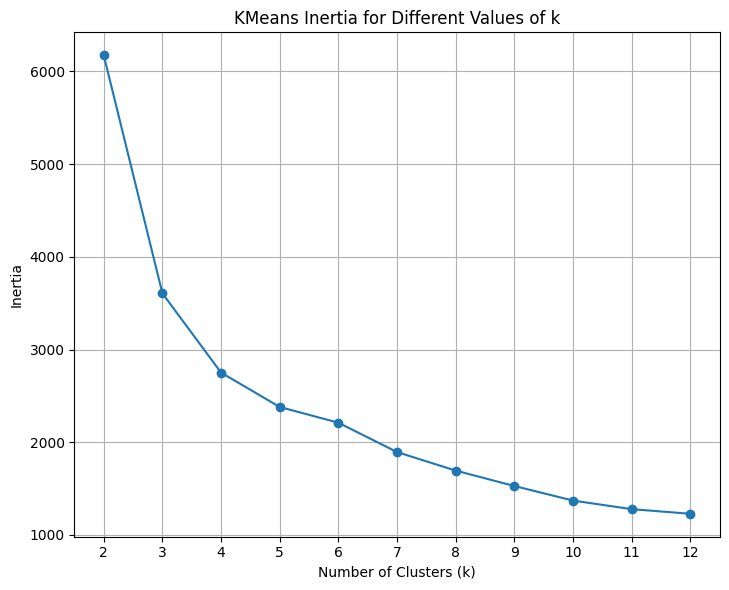

In [39]:
max_k = 12
inertia = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.tight_layout()
plt.show()

In [40]:
# now the elbow here is between 4 and 5 as the point of clusters gain an stability


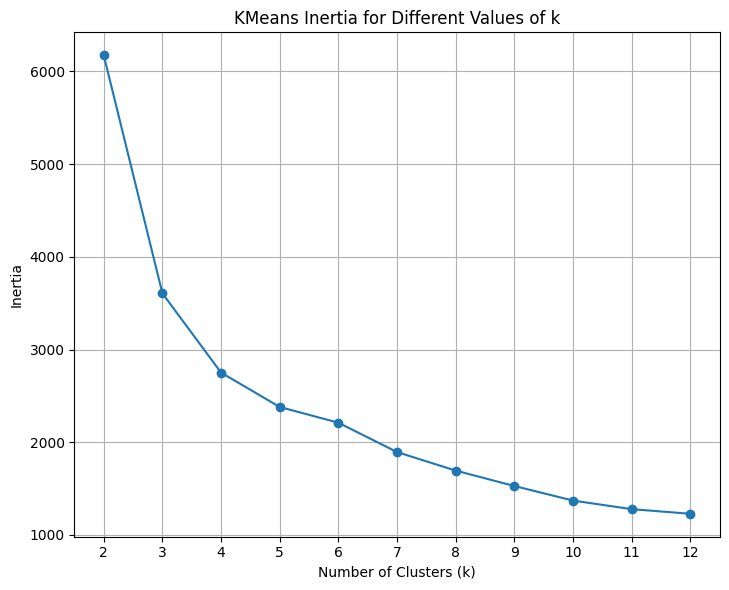

In [41]:
max_k = 12
inertia = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.tight_layout()
plt.show()

In [42]:
# according the above graph apprx of 4 to 5 centroids would be effecient for this
# dataset. to help us with this decision even better, we will be using another function
# called the shilloute score

# an high shilloute score means the centroids dont overlap,
# a less shilloute score means that the centroids overlap 
# if the score is [-1, 1] meand no overlap at all

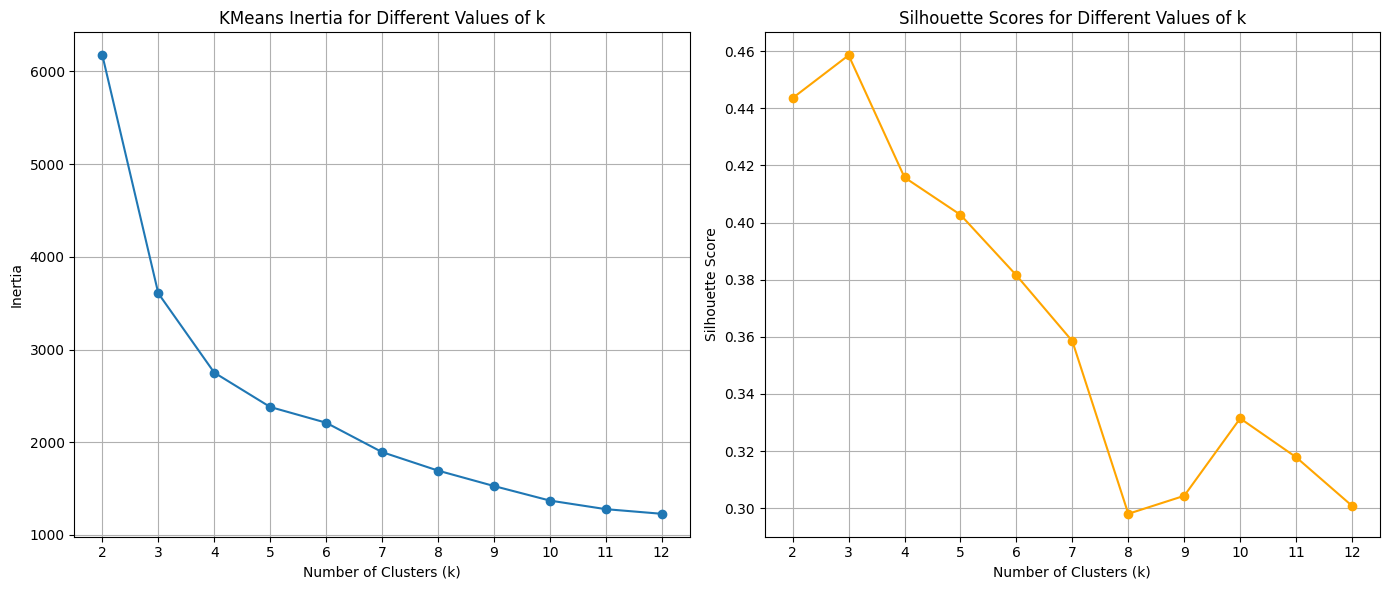

In [45]:
max_k = 12
inertia = []
shilhoutte_score = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    shilhoutte_score.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, shilhoutte_score, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [46]:
# comparing the shiloutte score, and k means inertia score, we can see that 4 to 5 is a better
# stable option as compared in both the graphs, and 4 having a better score compared to 4 & 5
# so we will go with 4 centroids 

In [47]:
# the less clusters the better becouse, it reduces the complexity 

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [49]:
# this array represents different cluster labels, 

In [51]:
non_outliers_df ["Cluster"] = cluster_labels
non_outliers_df

C:\Users\abhay\AppData\Local\Temp\ipykernel_25560\3021701394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df ["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


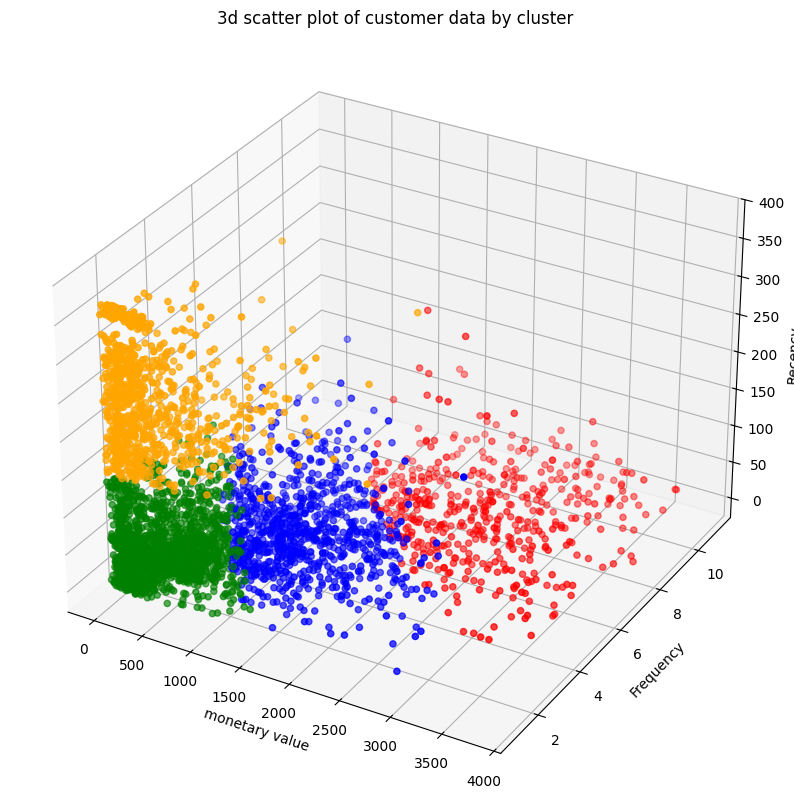

In [52]:
cluster_colors = {0: 'blue',
                  1: 'orange',
                  2: 'green',
                  3: 'red'}

colors = non_outliers_df['Cluster'].map(cluster_colors)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df["Frequency"],
                     non_outliers_df["Recency"],
                     c=colors,
                     marker='o')

ax.set_xlabel("monetary value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
ax.set_title("3d scatter plot of customer data by cluster")
plt.show()

In [53]:
# here in the above 3d model
# red cluster    --- high frequncy and low recency and high monetary values
# blue cluster   --- middle range
# green cluster  --- low monetary value, low frequncy, low recency
# orange cluster --- high recency. low monetary, average frequenct

In [54]:
# to be more specific about our clusters, we use 
# "voilin plot" to see various distriobution

# voilin plot

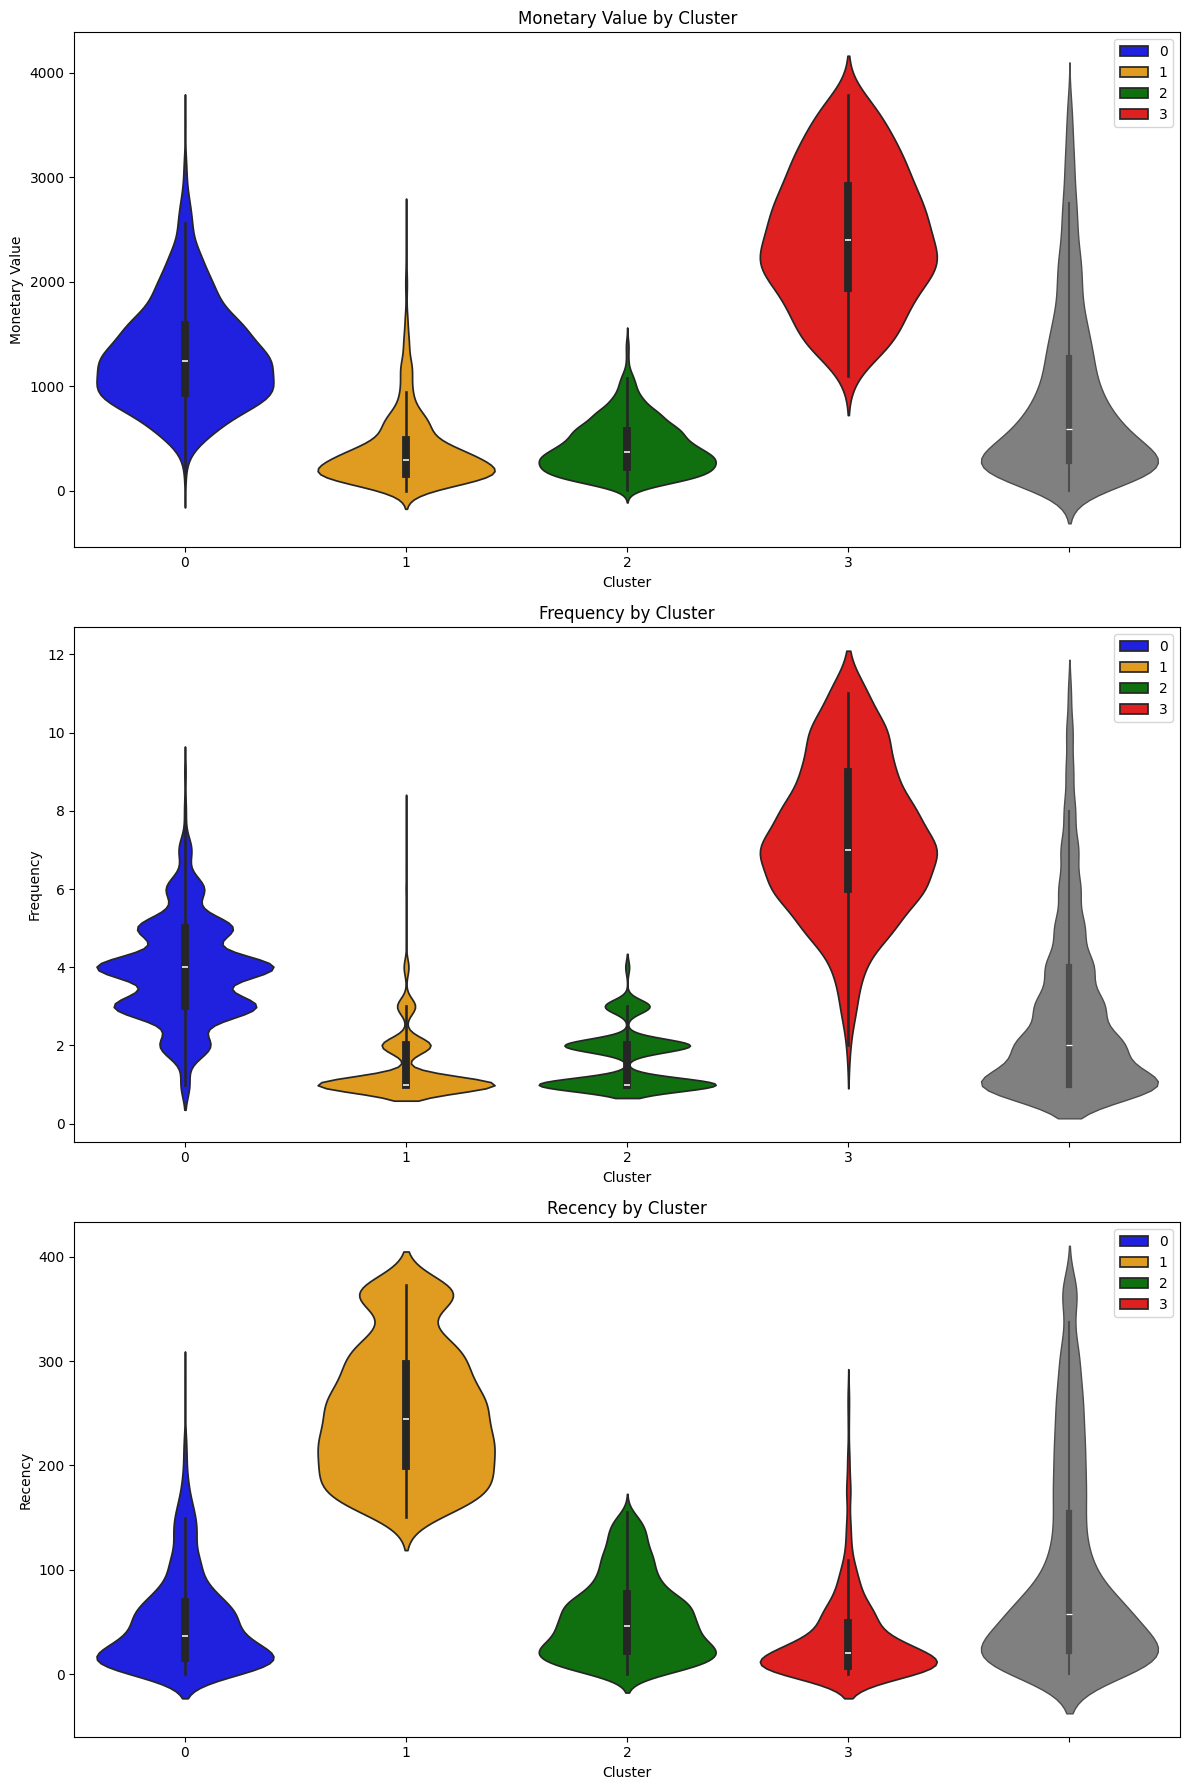

In [55]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

In [56]:
# the grey boilen represents full dataset, with out any clustering
# we acutally give these clusters meaninggful name, for the analyst to acutally
# base an actions based on the insights we found according to the dataset

## blue cluster: "class 1"
high monetary value | frequency higher | recency lower
so, this represents high value customers who purchase regularly, but not purchased anything recently

## orange cluster: "class 2"
low monetary value | infrequent | less recency | 
this means that, they spend less money on purchase, are infrequent and had not bought anything recently, 

## Green cluster: "class 3" 
less monetary | less frequncy | more recency | this means that they have bought something more recently but they bought low value items and are also less freqent

## Red clusters: "class 4"
high frequncy | high recency | high monetary | this means that these are high value customers who have bought high valued items, very frequnctly and also vvery much recntly

### Summary of Cluster Names:

Cluster 0 (Blue): "class 1" 

Cluster 1 (Orange): "class 2"

Cluster 2 (Green): "class 3"

Cluster 3 (Red): "class 4"

this data is of non outliers data, but we have to understand that even the data that has the ouliers are important to us, as there are a lot of them presnet, in the monetary frequncy and recency ouliers that are present, so let us have understanding of them" and include them in out analysis for a over all data set analysis

In [57]:
ovelapping_indices = monetary_outlers_df.index.intersection(frequency_outlers_df.index)

ovelapping_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [68]:
monetary_only_outliers = monetary_outlers_df.drop(ovelapping_indices)
frequency_only_outliers = frequency_outlers_df.drop(ovelapping_indices)
monetary_and_frequncy_outliers = monetary_outlers_df.loc[ovelapping_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequncy_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequncy_outliers])

In [69]:
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


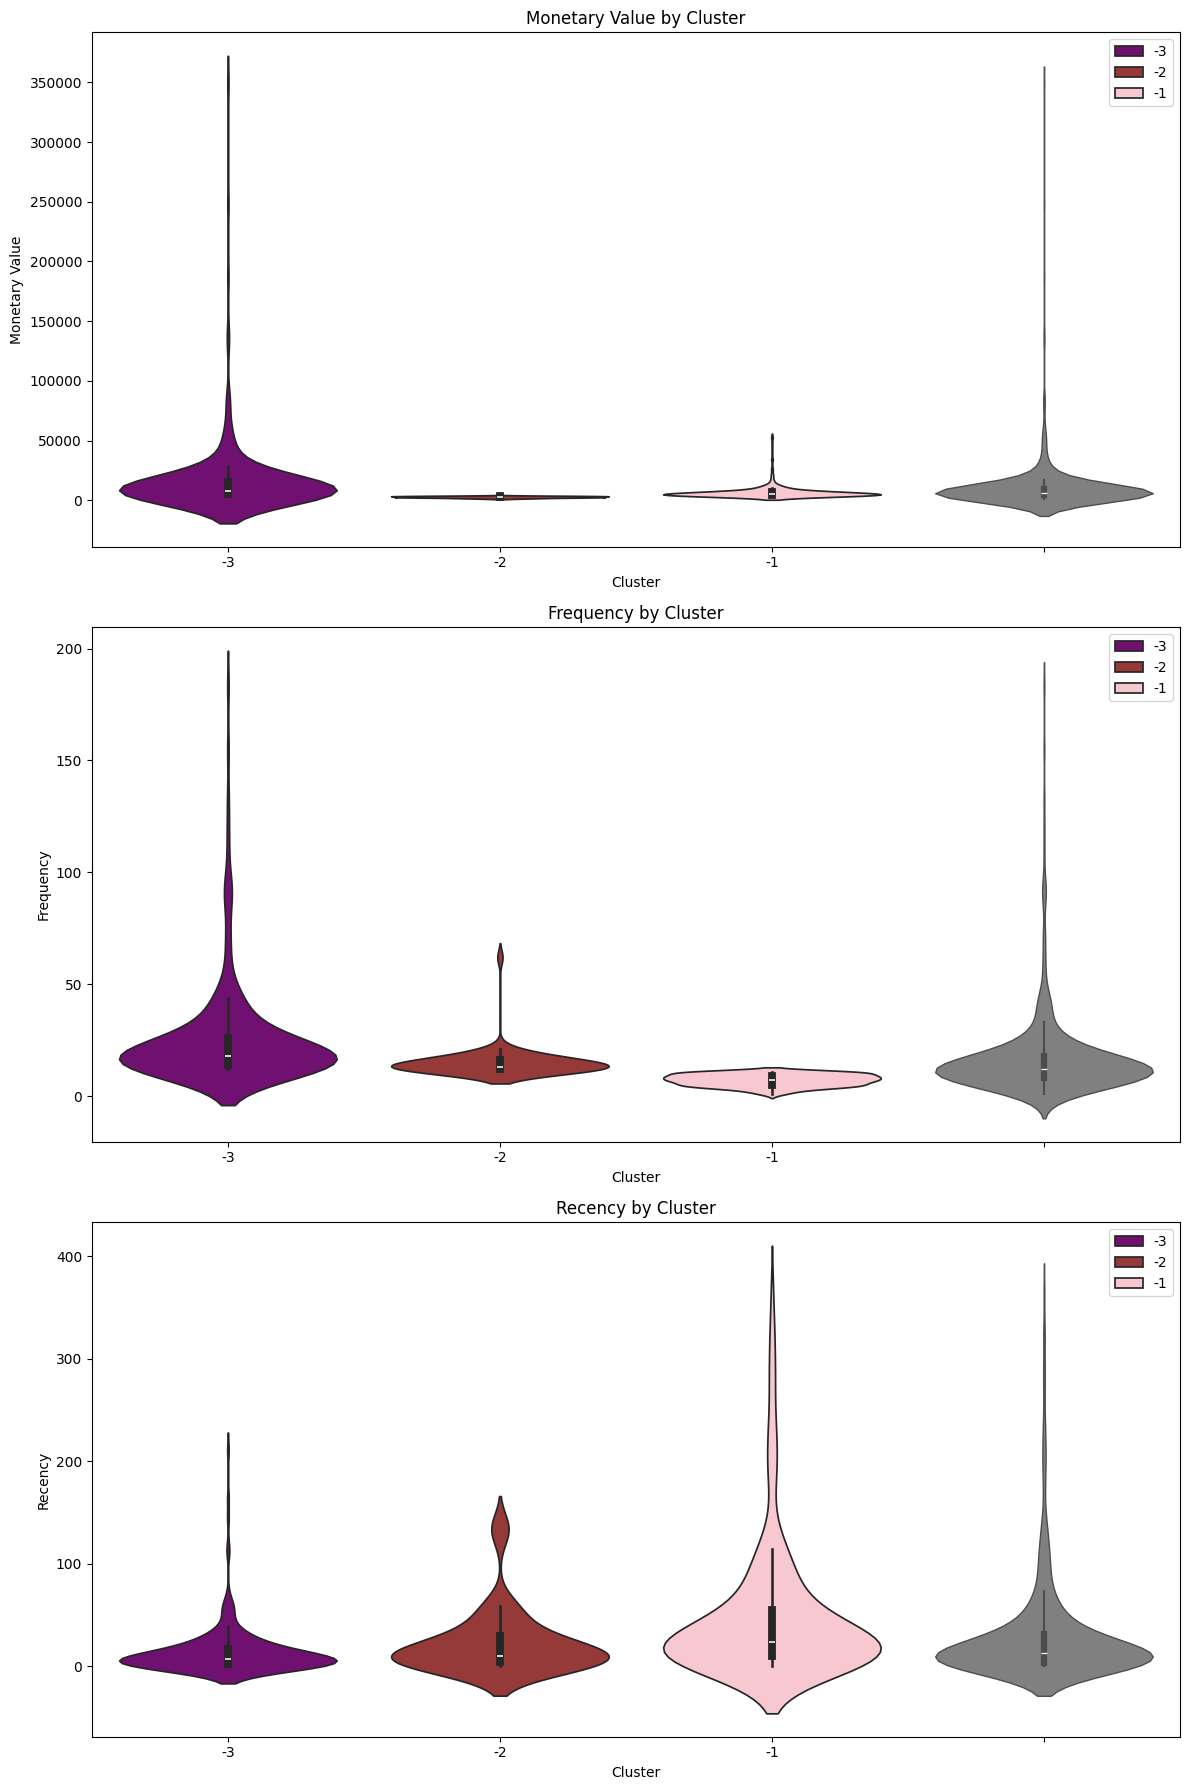

In [72]:
cluster_colors = {-1: 'pink',
                  -2: 'brown',
                  -3: 'purple'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

### cluster 1: "class 5"
high spenders

not frequent buyers

but made recent purchase"

### cluster 2: "class 6"

more frequency

less money spent

avg recency

### cluster 3: "class 7"
high frequncy

high money spending

high recency

In [73]:
cluster_labels = {
    0 : "class 1",
    1 : "class 2",
    2 : "class 3",
    3 : "class 4",
    -1 : "class 5",
    -2 : "class 6",
    -3 : "class 7",
}

In [75]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [80]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,Cluster Label,MonetaryValue per 100 pounds,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,class 2,1.6936,class 2
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,class 1,13.2332,class 1
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,class 3,2.2116,class 3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,class 1,22.2114,class 1
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,class 3,3.0093,class 3
...,...,...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,class 7,75.1631,class 7
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,class 7,75.4514,class 7
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,class 7,66.5083,class 7
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,class 7,47.9180,class 7


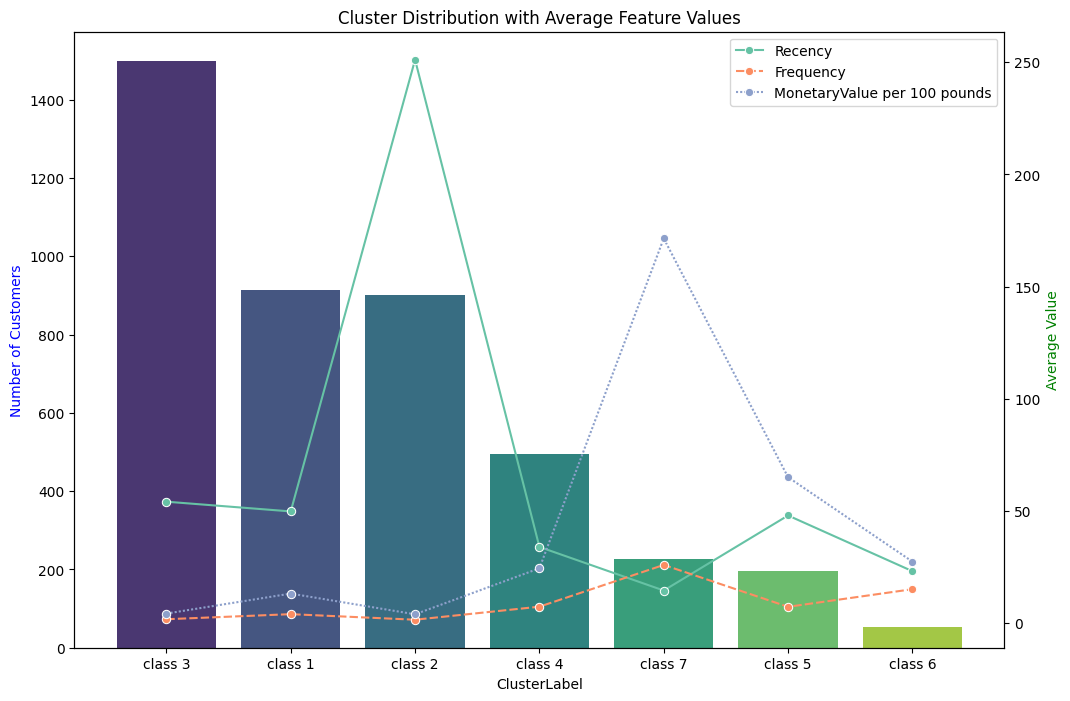

In [81]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()